
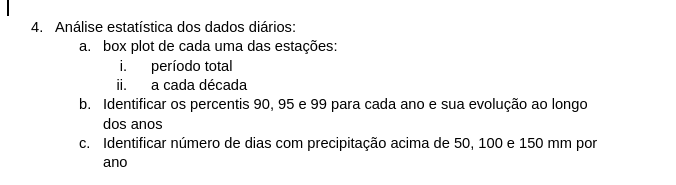


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura dos arquivos DAEE
- Em caso de alteração, defina a sua pasta onde estão os csvs

In [ ]:
from pathlib import Path

estacoes_sv = ['E3-228', 'E3-066', 'E3-065', 'E3-064', 'E3-063', 'E3-062', 'E3-056']

path = Path('data/Estações DAEE')
files = []
for arquivo in path.glob("*.csv"):
  print(arquivo)
  files.append(arquivo)

/content/drive/MyDrive/EACH_ACH3778 Eventos Extremos/Estações DAEE/E3-228_Chuva_Diaria_Serie_20240918_122948.csv
/content/drive/MyDrive/EACH_ACH3778 Eventos Extremos/Estações DAEE/E3-066_Chuva_Diaria_Serie_20240918_122928.csv
/content/drive/MyDrive/EACH_ACH3778 Eventos Extremos/Estações DAEE/E3-065_Chuva_Diaria_Serie_20240918_122918.csv
/content/drive/MyDrive/EACH_ACH3778 Eventos Extremos/Estações DAEE/E3-064_Chuva_Diaria_Serie_20240918_122858.csv
/content/drive/MyDrive/EACH_ACH3778 Eventos Extremos/Estações DAEE/E3-063_Chuva_Diaria_Serie_20240918_122846.csv
/content/drive/MyDrive/EACH_ACH3778 Eventos Extremos/Estações DAEE/E3-062_Chuva_Diaria_Serie_20240918_122827.csv
/content/drive/MyDrive/EACH_ACH3778 Eventos Extremos/Estações DAEE/E3-056_Chuva_Diaria_Serie_20240918_122745.csv


In [ ]:
df_daee = pd.DataFrame() #dataframe que contena as infos de todos os arquivos
for f_path in files:
  df = pd.read_csv(f_path, sep=';')
  estacao = str(f_path).split("DAEE/")[1].split('_')[0]
  print(estacao)
  df = df.rename(columns={'Chuva total,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,': 'chuva_total', 'Mês/Ano': 'mes_ano'})
  df['estacao'] = estacao
  df_daee = pd.concat([df_daee, df], ignore_index=True)

E3-228
E3-066
E3-065
E3-064
E3-063
E3-062
E3-056


In [ ]:
df_daee.head()

,mes_ano,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,Chuva máxima,chuva_total,estacao
0,08/1939,---,---,---,---,---,---,---,---,---,...,---,---,---,---,---,"0,0","0,0",---,"---,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",E3-228
1,09/1939,"10,5","42,4","6,2","2,4","0,7","22,0","0,0","0,0","0,0",...,"4,8","1,3","0,0","0,0","0,8","2,0",---,"42,4","138,3,",E3-228
2,10/1939,"0,7","1,7","12,0","0,0","5,0","14,5","0,0","0,0","0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","14,5","33,9",E3-228
3,11/1939,"0,0","0,0","0,0","6,8","3,3","2,0","5,3","14,0","18,4",...,"10,0","12,0","8,0","0,0","0,0","12,5",---,"25,0","227,7,",E3-228
4,12/1939,"3,0","0,5","3,5","0,0","37,6","12,0","0,0","0,0","0,0",...,"63,1","12,0","42,0","0,0","0,0","0,0","0,0","63,1","259,3",E3-228


In [ ]:

df_sample = df_daee[['mes_ano', 'chuva_total', 'estacao']]
df_sample['mês'] = df_sample['mes_ano'].str.split('/').str[0]
df_sample = df_sample.drop(columns=['mes_ano'])
df_sample['chuva_total'] = df_sample['chuva_total'].str.rstrip(',')
df_sample['chuva_total'] = df_sample['chuva_total'].replace('---', np.nan)
df_sample['chuva_total'] = df_sample['chuva_total'].str.replace(',', '.')
df_sample['chuva_total'] = pd.to_numeric(df_sample['chuva_total'])

df_sample.head()

/tmp/ipython-input-3155970848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['mês'] = df_sample['mes_ano'].str.split('/').str[0]


,chuva_total,estacao,mês
0,NaN,E3-228,08
1,138.3,E3-228,09
2,33.9,E3-228,10
3,227.7,E3-228,11
4,259.3,E3-228,12


# Análise diária

E3-228


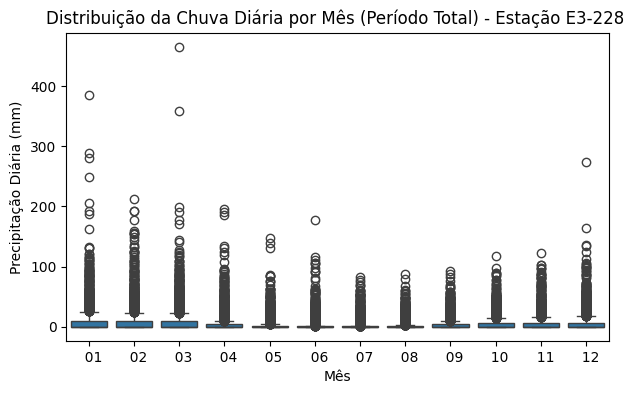

E3-066


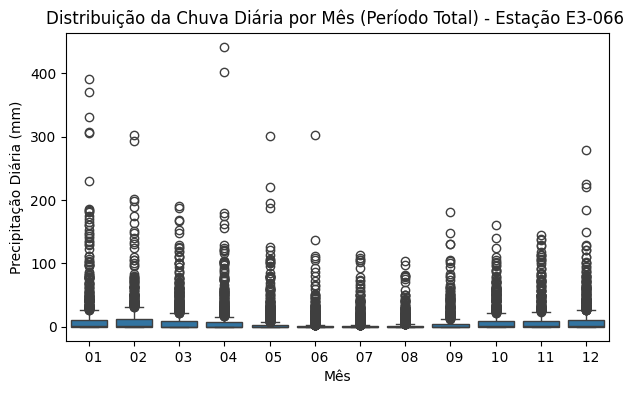

E3-065


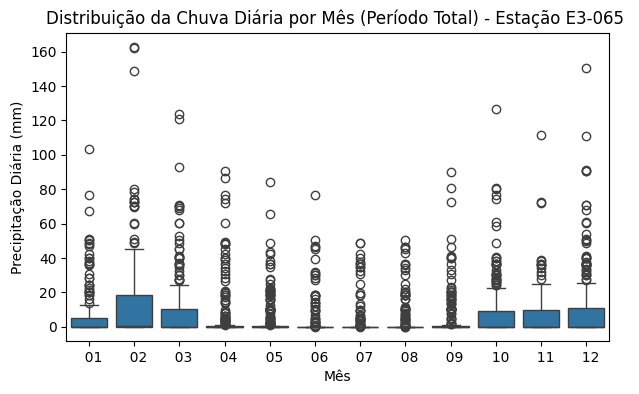

E3-064


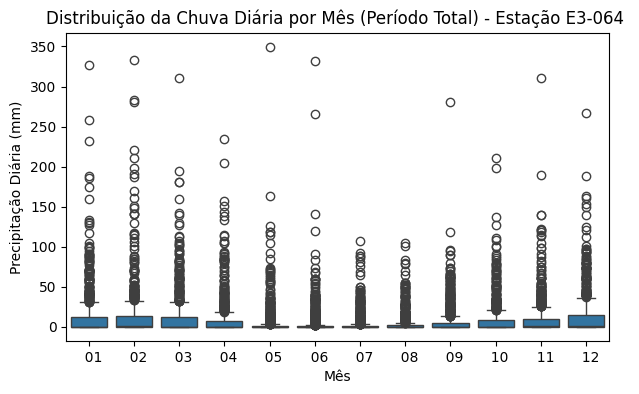

E3-063


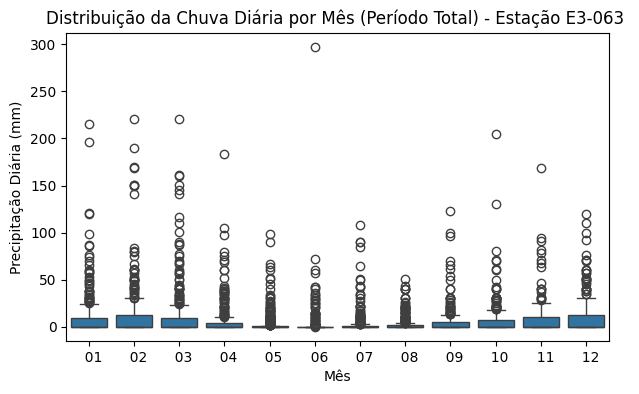

E3-062


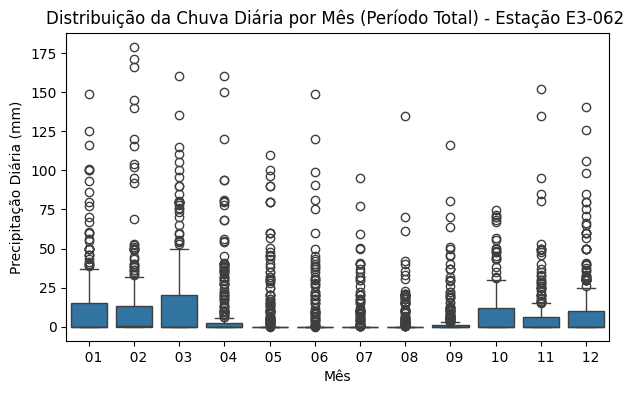

E3-056


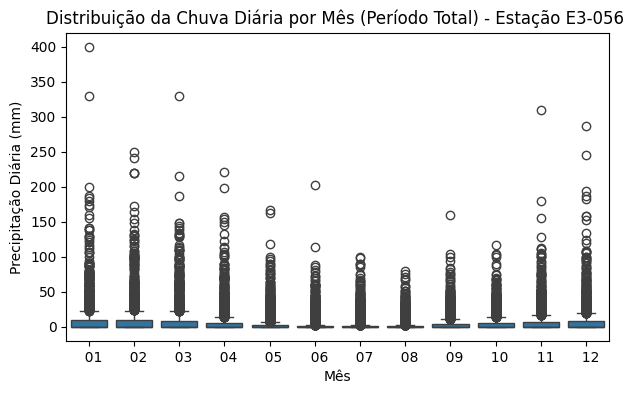

In [55]:
ordem_meses_presentes = sorted(df_long['mês'].unique(), key=int)

for estacao in estacoes_sv:
    print(estacao)
    df_estacao = df_long[df_long['estacao'] == estacao]
    df_estacao = df_estacao[df_estacao['precipitacao'] <= 600]

    plt.figure(figsize=(7, 4))
    sns.boxplot(
        data=df_estacao,
        x='mês',
        y='precipitacao',
        order=ordem_meses_presentes,
        showfliers=True
    )

    plt.title(f'Distribuição da Chuva Diária por Mês (Período Total) - Estação {estacao} ')
    plt.xlabel('Mês')
    plt.ylabel('Precipitação Diária (mm)')
    plt.show()

# Analise mensal agrupada



E3-228


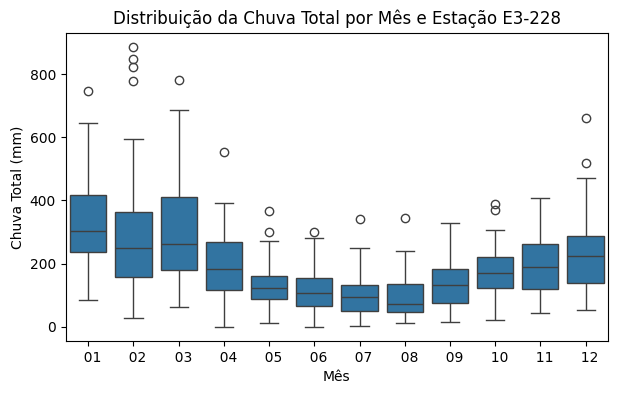

E3-066


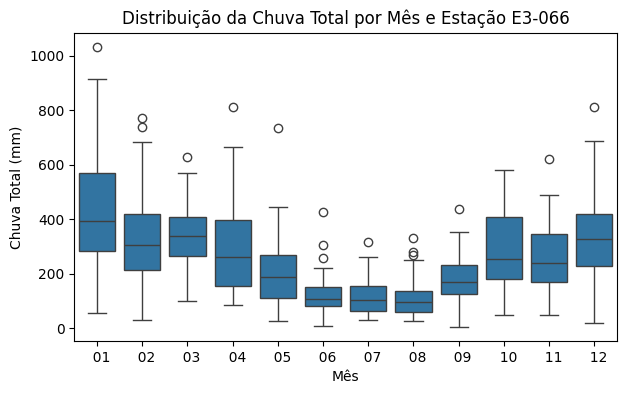

E3-065


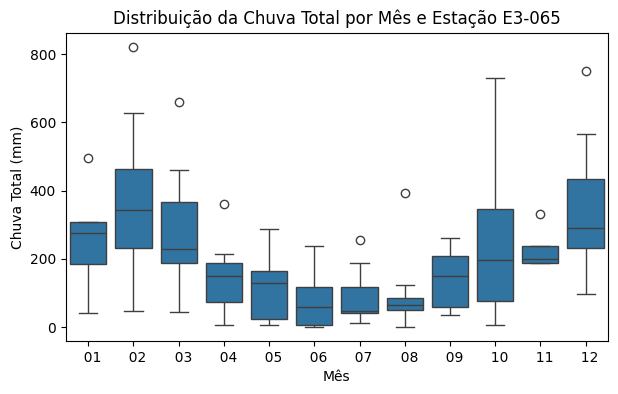

E3-064


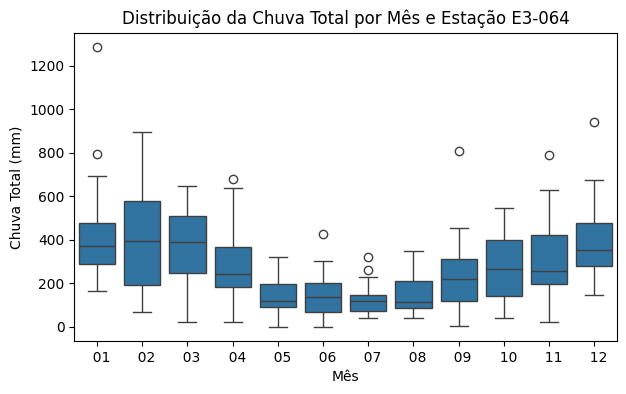

E3-063


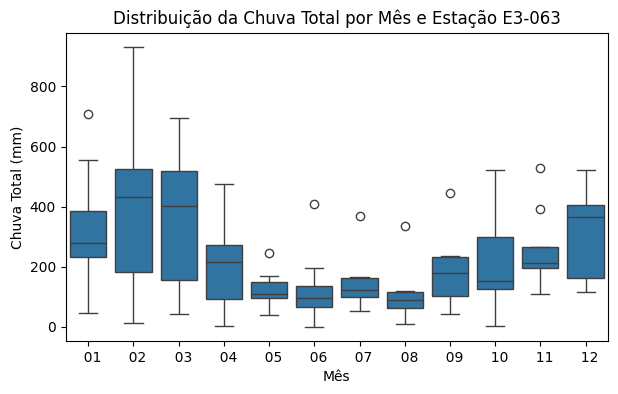

E3-062


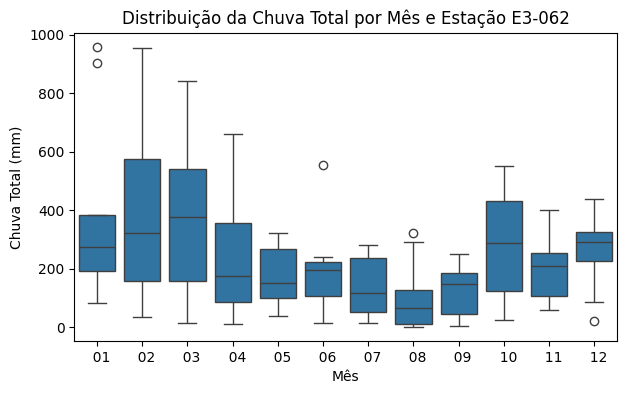

E3-056


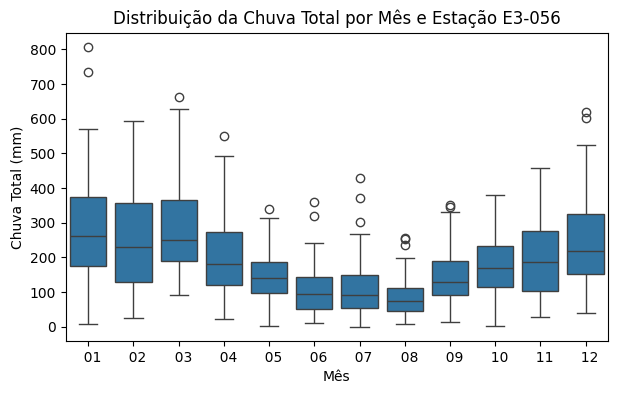

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

ordem_meses_presentes = sorted(df_sample['mês'].unique(), key=int)


for estacao in estacoes_sv:
    print(estacao)
    df_estacao = df_sample[df_sample['estacao'] == estacao]

    plt.figure(figsize=(7, 4))

    sns.boxplot(x='mês', y='chuva_total', data=df_estacao, order=ordem_meses_presentes)

    plt.title(f'Distribuição da Chuva Total por Mês e Estação {estacao}')
    plt.xlabel('Mês')
    plt.ylabel('Chuva Total (mm)')
    plt.show()

In [57]:
df_original = df_daee.copy()

dias_colunas = [str(i) for i in range(1, 32)]

df_long = pd.melt(df_original,
                  id_vars=['mes_ano', 'estacao'],
                  value_vars=dias_colunas,
                  var_name='dia',
                  value_name='precipitacao')


df_long['precipitacao'] = df_long['precipitacao'].replace('---', pd.NA)

df_long = df_long.dropna(subset=['precipitacao'])

df_long['precipitacao'] = df_long['precipitacao'].astype(str).str.replace(',', '.')

df_long['precipitacao'] = pd.to_numeric(df_long['precipitacao'])

df_long['mês'] = df_long['mes_ano'].str.split('/').str[0]
df_long['ano'] = df_long['mes_ano'].str.split('/').str[1].astype(int)
df_long['decada'] = (df_long['ano'] // 10) * 10

print(df_long.head())

     mes_ano estacao dia  precipitacao   mês   ano  decada
1    09/1939  E3-228   1          10.5    09  1939    1930
2    10/1939  E3-228   1           0.7    10  1939    1930
3    11/1939  E3-228   1           0.0    11  1939    1930
4    12/1939  E3-228   1           3.0    12  1939    1930
5    01/1940  E3-228   1           0.0    01  1940    1940


In [58]:
df_long.head()

,mes_ano,estacao,dia,precipitacao,mês,ano,decada
1,09/1939,E3-228,1,10.5,09,1939,1930
2,10/1939,E3-228,1,0.7,10,1939,1930
3,11/1939,E3-228,1,0.0,11,1939,1930
4,12/1939,E3-228,1,3.0,12,1939,1930
5,01/1940,E3-228,1,0.0,01,1940,1940


# Distribuição por década

E3-228


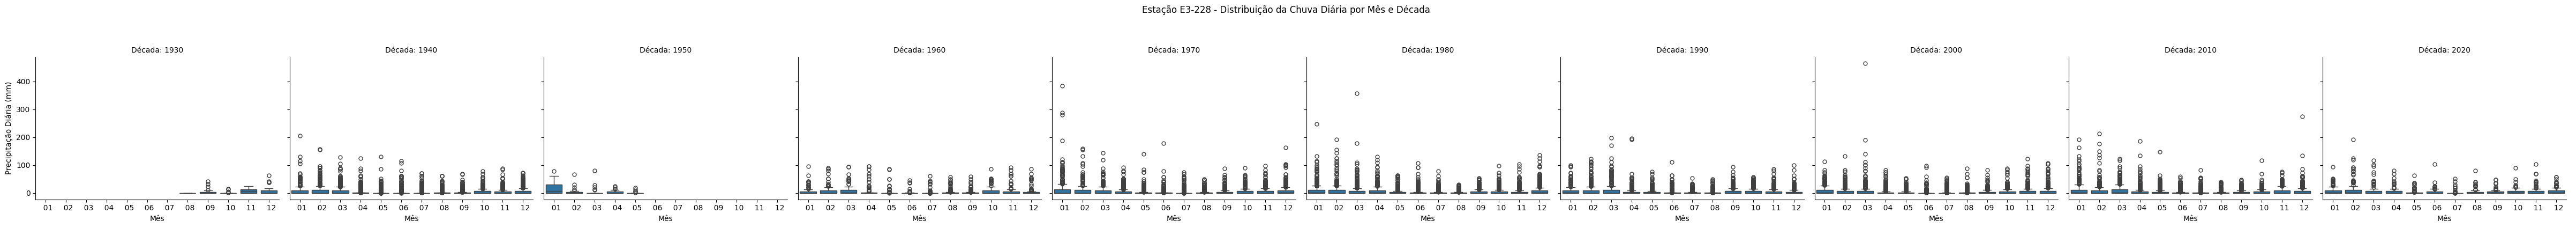

E3-066


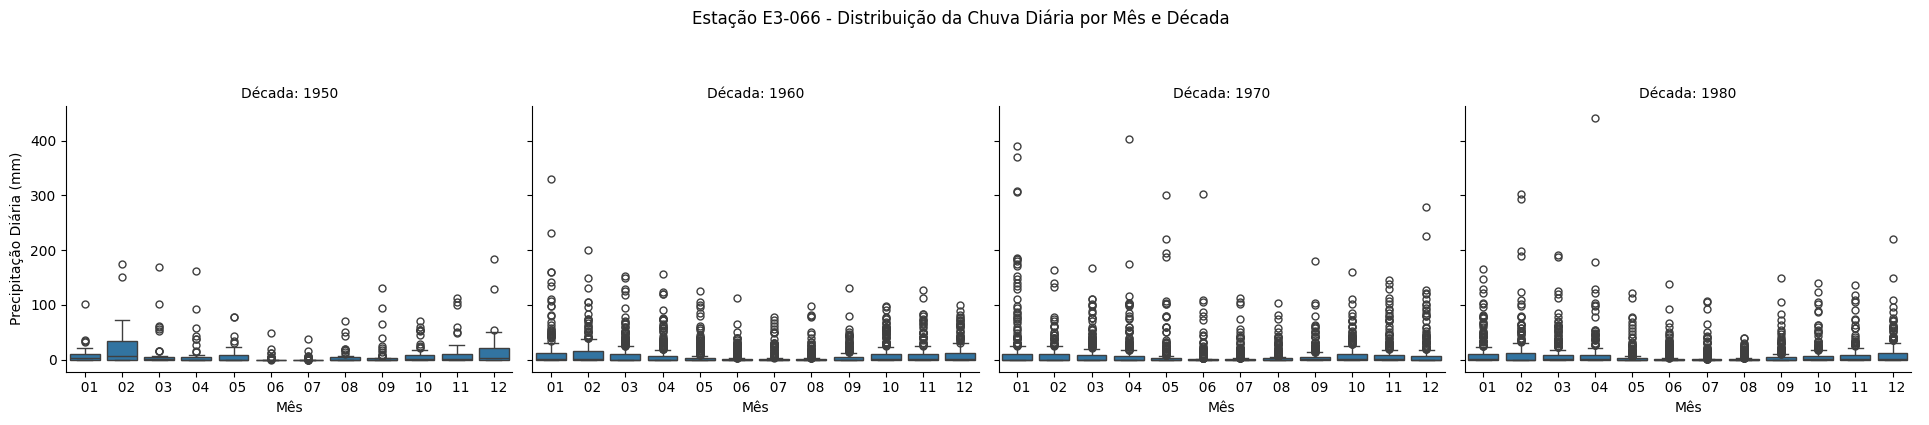

E3-065


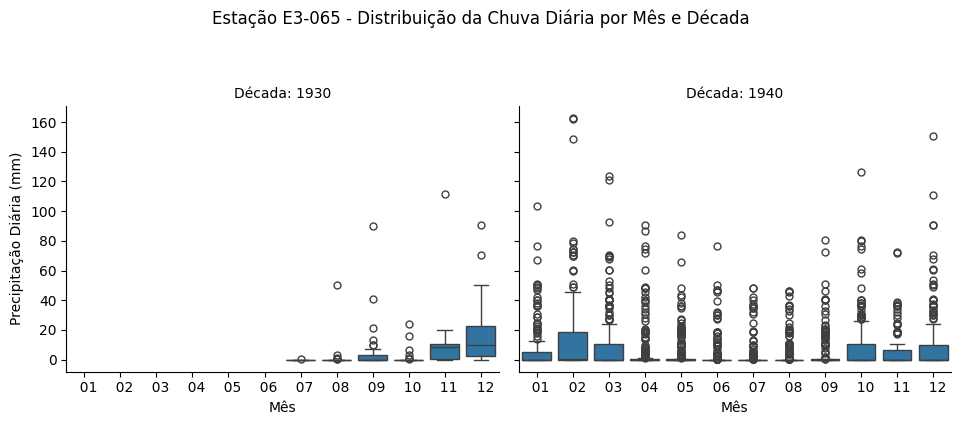

E3-064


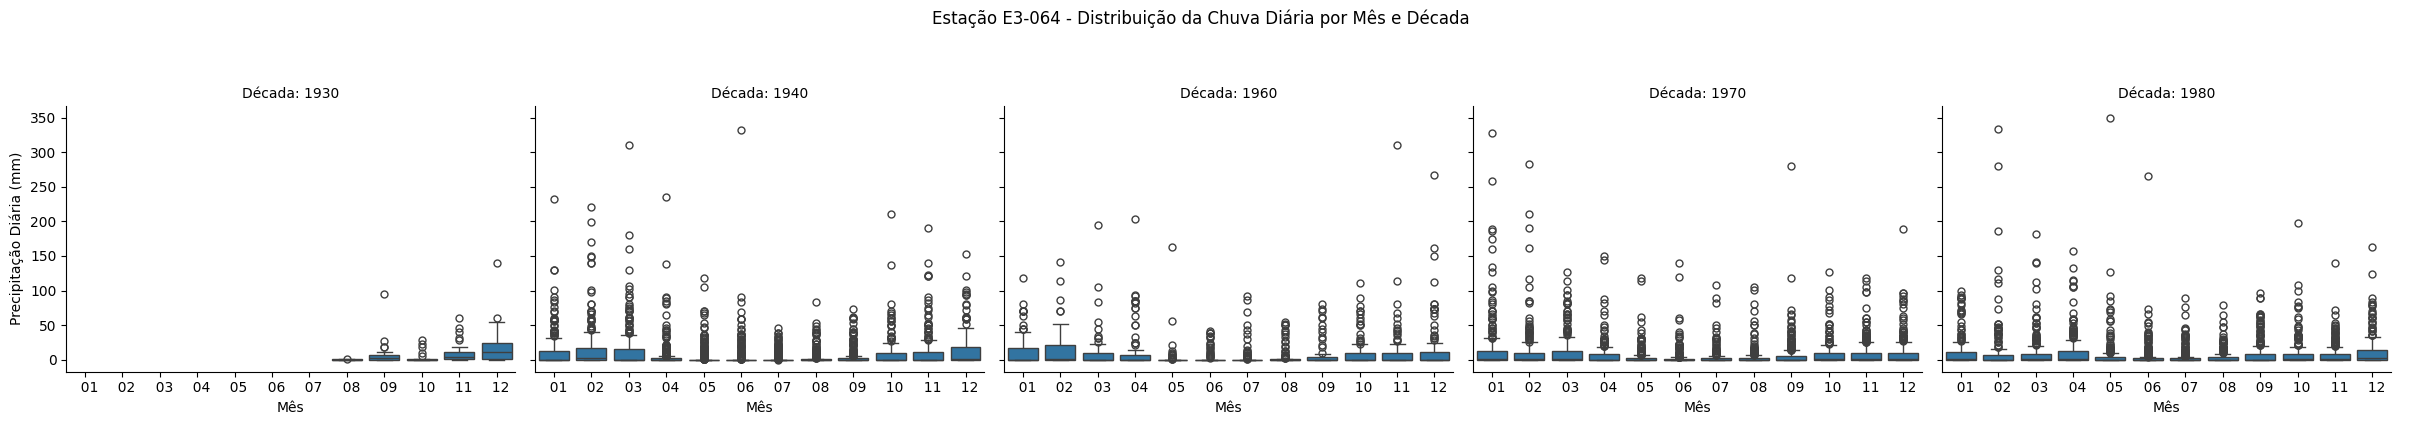

E3-063


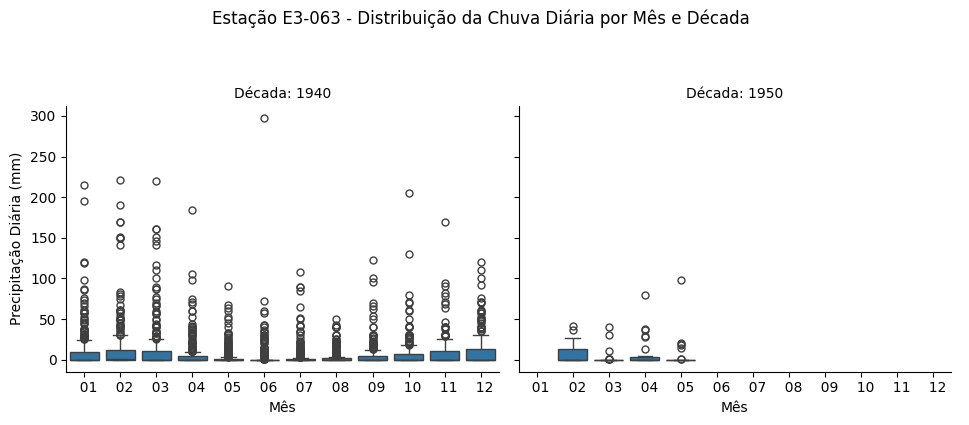

E3-062


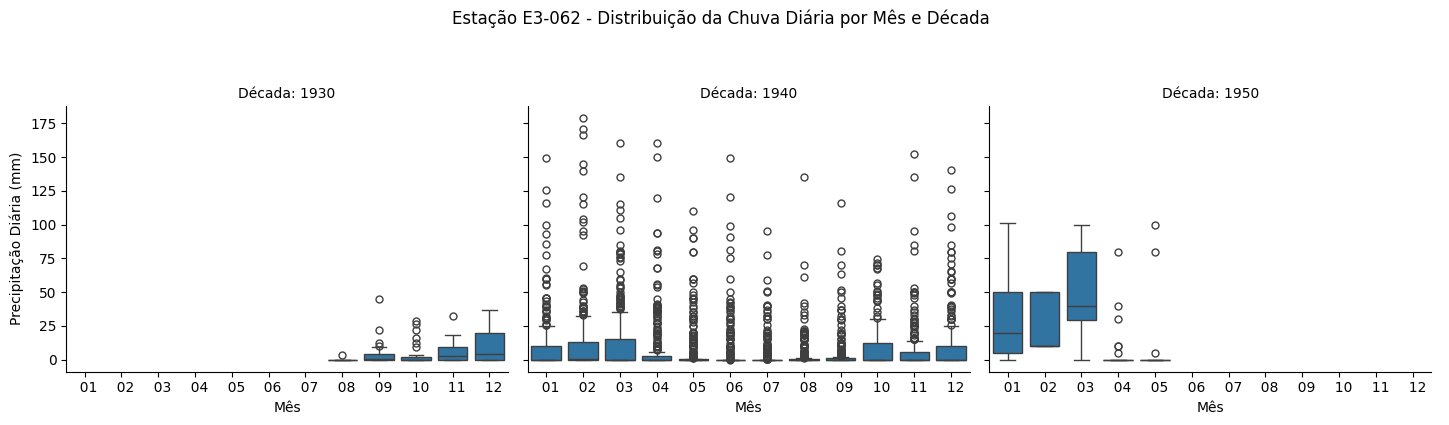

E3-056


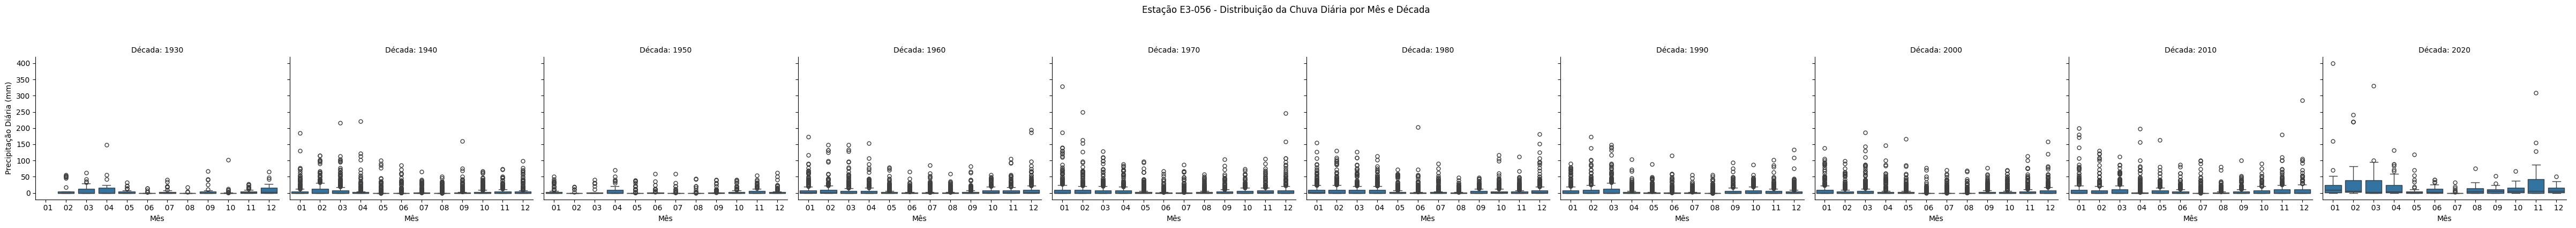

In [59]:

for estacao in estacoes_sv:
    print(estacao)
    df_estacao = df_long[df_long['estacao'] == estacao]
    df_estacao = df_estacao[df_estacao['precipitacao'] <= 600]

    g = sns.catplot(
        data=df_estacao,
        x='mês',
        y='precipitacao',
        col='decada',
        kind='box',
        order=ordem_meses_presentes,
        #col_wrap=3,
        height=4,
        aspect=1.2,
        showfliers=True,
        sharey=True)

    g.tick_params(axis='x', labelbottom=True)

    g.set_axis_labels('Mês', 'Precipitação Diária (mm)')
    g.set_titles("Década: {col_name}")

    g.fig.suptitle(f'Estação {estacao} - Distribuição da Chuva Diária por Mês e Década', y=1.05)

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

# Percentis

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

percentis = [0.90, 0.95, 0.99]

df_percentis = df_long.groupby(['ano'])['precipitacao'].quantile(percentis)


df_percentis = df_percentis.unstack()

df_percentis = df_percentis.rename(columns={
    0.90: 'p90',
    0.95: 'p95',
    0.99: 'p99'
})

df_percentis = df_percentis.reset_index()

df_percentis.head(100)

,ano,p90,p95,p99
0,1938,2.30,4.200,44.580
1,1939,20.05,36.100,63.260
2,1940,23.20,42.925,92.357
3,1941,25.00,41.820,89.808
4,1942,20.28,34.500,80.616
...,...,...,...,...
78,2019,26.70,40.655,84.506
79,2020,27.14,48.360,214.888
80,2021,24.98,40.010,92.610
81,2022,28.68,45.040,101.768


/tmp/ipython-input-4104882127.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


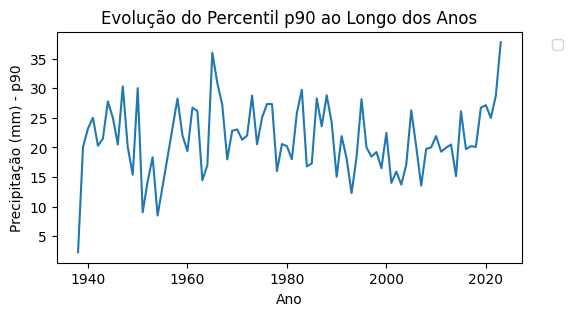

/tmp/ipython-input-4104882127.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


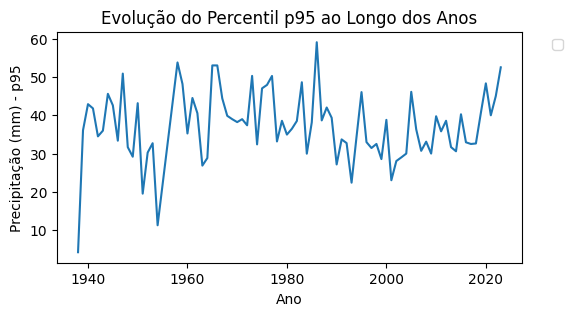

/tmp/ipython-input-4104882127.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


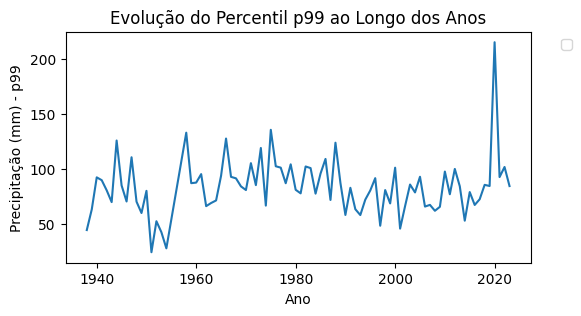

In [61]:
percentis = ['p90','p95', 'p99']

for perc in percentis:

  plt.figure(figsize=(6, 3))
  sns.lineplot(data=df_percentis, x='ano', y=perc)
  plt.title(f'Evolução do Percentil {perc} ao Longo dos Anos')
  plt.ylabel(f'Precipitação (mm) - {perc}')
  plt.xlabel('Ano')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
  plt.show()




# Distribuição de chuva maior que 50mm

In [62]:
df_contagem = df_long.copy()

df_contagem['dias_>50mm'] = df_contagem['precipitacao'] > 50
df_contagem['dias_>100mm'] = df_contagem['precipitacao'] > 100
df_contagem['dias_>150mm'] = df_contagem['precipitacao'] > 150

colunas_para_somar = ['dias_>50mm', 'dias_>100mm', 'dias_>150mm']
df_contagem_anual = df_contagem.groupby(['estacao','ano'])[colunas_para_somar].sum()

df_contagem_anual = df_contagem_anual.reset_index()

print("\n Contagem de Dias Extremos por Ano")
print(df_contagem_anual.head())


 Contagem de Dias Extremos por Ano
  estacao   ano  dias_>50mm  dias_>100mm  dias_>150mm
0  E3-056  1938           1            1            0
1  E3-056  1939           9            1            0
2  E3-056  1940          10            4            2
3  E3-056  1941          18            5            2
4  E3-056  1942           5            1            0


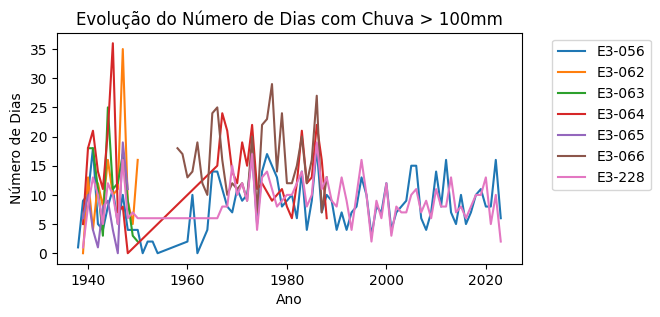

In [63]:
plt.figure(figsize=(6, 3))
sns.lineplot(data=df_contagem_anual, x='ano', y='dias_>50mm', hue='estacao')


plt.title('Evolução do Número de Dias com Chuva > 100mm')
plt.ylabel('Número de Dias')
plt.xlabel('Ano')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

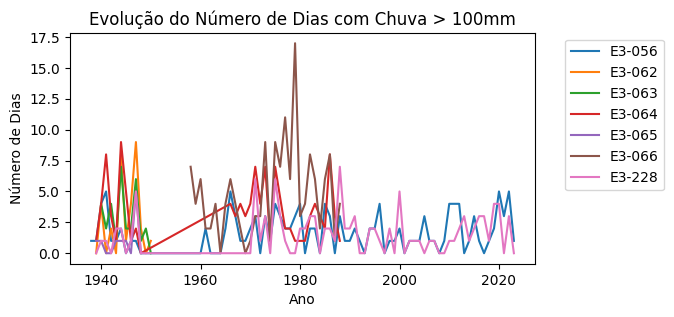

In [64]:

plt.figure(figsize=(6, 3))
sns.lineplot(data=df_contagem_anual, x='ano', y='dias_>100mm', hue='estacao')


plt.title('Evolução do Número de Dias com Chuva > 100mm')
plt.ylabel('Número de Dias')
plt.xlabel('Ano')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

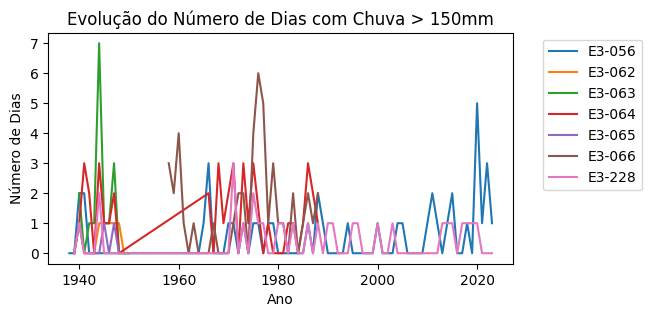

In [65]:
plt.figure(figsize=(6, 3))
sns.lineplot(data=df_contagem_anual, x='ano', y='dias_>150mm', hue='estacao')


plt.title('Evolução do Número de Dias com Chuva > 150mm')
plt.ylabel('Número de Dias')
plt.xlabel('Ano')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()